# Q. Prepare rules for the all the datasets 
### 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
### 2) Change the minimum length in apriori algorithm
### 3) Visulize the obtained rules using different plots 

## Association Rule
- **Association Rule Learning** is rule-based learning for identifying the association between different variables in a database. One of the best and most popular examples of Association Rule Learning is the Market Basket Analysis. The problem analyses the association between various items that has the highest probability of being bought together by a customer.<br>
<br>
- For example, the association rule, {onions, chicken masala} => {chicken} says that a person who has got both onions and chicken masala in his or her basket has a high probability of buying chicken also.

## Apriori Algorithm
The algorithm was first proposed in 1994 by Rakesh Agrawal and Ramakrishnan Srikant. Apriori algorithm finds the most frequent itemsets or elements in a transaction database and identifies association rules between the items just like the above-mentioned example.

### How Apriori Algorithm works ?
To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

**Support:**

The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :
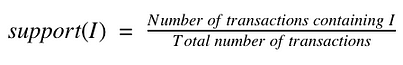<br>

**Support** indicates how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.
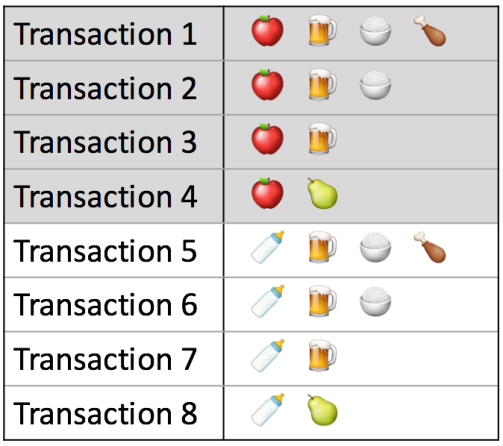

**Confidence:**

This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1. 
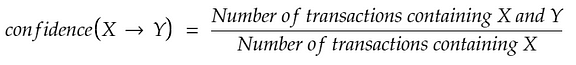
Confidence says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.
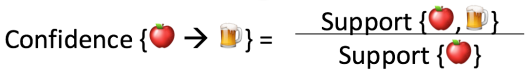

**Lift:**

Lift is the ratio between the confidence and support.

Lift says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought. (X represents apple and Y represents beer)
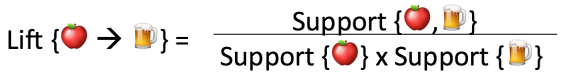

## Importing Libraries

In [2]:
#Import Libraries
!pip install mlxtend
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

## Loading Dataset

In [5]:
df = pd.read_csv('my_movies.csv')
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
data = df.iloc[:,5:]
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


## Data Description
- The dataset has 2000 rows of the purchase orders/transaction of people from the Movie store. 

- These orders can be analysed and association rules can be generated using Market Basket Analysis by algorithms like Apriori Algorithm.

- Data preprocessing not required as it is already in transaction format.

## Data Exploration

In [7]:
#Most popular items
count = data.loc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [8]:
data.shape

(10, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [10]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print()

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



In [11]:
print('The unique books sold are {}'.format(data.columns))
print("The number of unique books sold are {} ".format(data.columns.size))

The unique books sold are Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')
The number of unique books sold are 10 


## Data Visualization
### Word Cloud

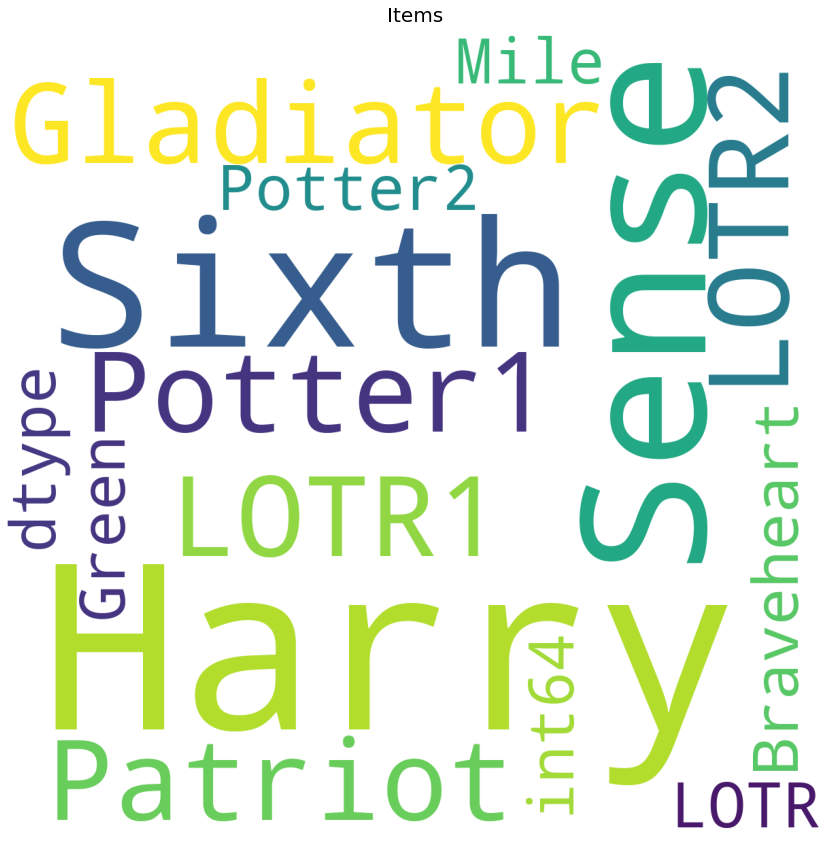

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data.sum()))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

### Pie Chart

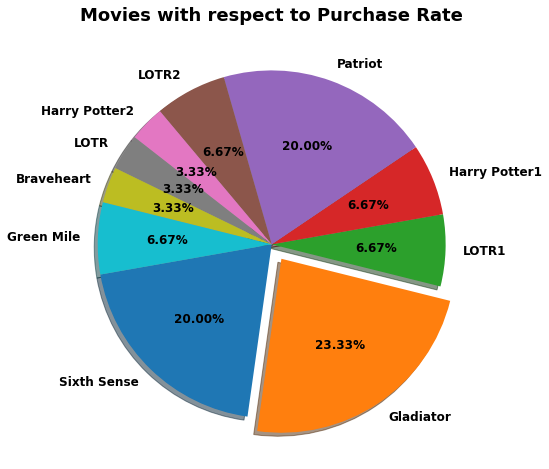

In [13]:
plt.figure(figsize = (12,8))
plt.pie(data.sum(),
       labels=data.columns,
       explode = [0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Movies with respect to Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()


In [14]:
#Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


### Horizontal Barplot

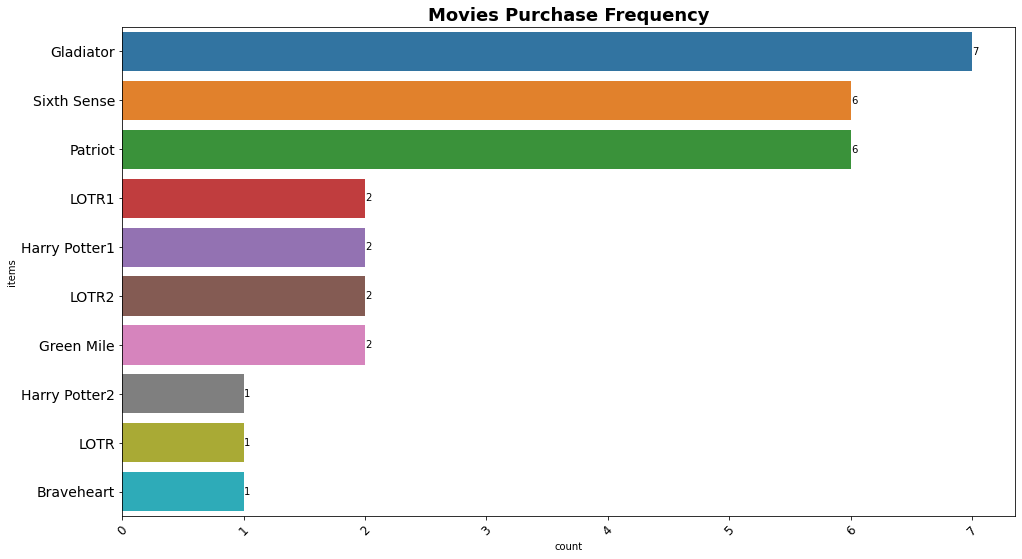

In [15]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = 'count', y = 'items', data= count)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title('Movies Purchase Frequency',  fontsize = 18, fontweight = 'bold')
for i in ax.containers:
    ax.bar_label(i,)


### Observations:
- Most Frequent Bought Books are : **Gladiator** & **Sixth Sense**

## Support and Length
### If we divide all items with row number, we can find Support value. Our threshold value is 0.2 for Support value.

In [16]:
#Product Frequency / Total Sales
first = pd.DataFrame(data.sum() / data.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [17]:
#Elimination by Support Value
first[first.Support >= 0.1]


,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [18]:
#Elimination by Support Value
first[first.Support >= 0.15]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [19]:
#Elimination by Support Value
first[first.Support >= 0.20]


,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


**Second Iteration:** Find support values for pair product combinations.

In [20]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]

#Sample of combinations
second[:10]

[['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'LOTR1'],
 ['Gladiator', 'Harry Potter1'],
 ['Gladiator', 'LOTR2'],
 ['Gladiator', 'Green Mile'],
 ['Gladiator', 'Harry Potter2'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Braveheart'],
 ['Sixth Sense', 'Patriot']]

In [21]:
#Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum() 
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)

    #Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

#Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


In [22]:
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]

#Sample of combinations
second[:10]

[['Gladiator', 'Sixth Sense', 'Patriot'],
 ['Gladiator', 'Sixth Sense', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Braveheart'],
 ['Gladiator', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Patriot', 'Harry Potter1']]

In [23]:
#Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum() 
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
    
#Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

#Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Sixth Sense, Patriot)",0.4,3


In [24]:
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]

#Sample of combinations
second[:10]

[['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Braveheart'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Green Mile']]

In [25]:
#Finding support values
value = []
for i in range(0, len(second)):
    temp = data.T.loc[second[i]].sum() 
    temp = len(temp[temp == data.T.loc[second[i]].shape[0]]) / data.shape[0]
    value.append(temp)
    
#Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

#Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


# Association Rules
### There are two main functions here.

- **Apriori()** function evaluate support value for each product.
- **Association Rules()** function help us to understand relationship between antecedents and consequences products. It gives some remarkable information about products.

Especially, "antecedent support", "consequent support", "support", "confidence" and "lift" variables are very important to make some business decisions.

To construct association rules between elements or items, the algorithm considers 3 important factors which are, support, confidence and lift. Each of these factors is explained as follows:

- Support: The support of item I is defined as the ratio between the number of transactions containing the item I by the total number of transactions expressed as :

- Support(I)=Number of transactions containing I/Total number of Transactions

- Confidence: This is measured by the proportion of transactions with item I1, in which item I2 also appears. The confidence between two items I1 and I2, in a transaction is defined as the total number of transactions containing both items I1 and I2 divided by the total number of transactions containing I1.

- Confidence(I1->I2)=Number of Transactions containing I1 and I2/(Total Number of Transactions containing I1)

- Lift: Lift is the ratio between the confidence and support expressed as :

**Lift(I1->I2)=Confidence(I1->I2)/Support(I2)**

## Association rules with 10% Support and 30% confidence
### Generating frequent itemsets from a list of items:
First step in generation of association rules is to get all the frequent itemsets on which binary partitions can be performed to get the antecedent and the consequent.
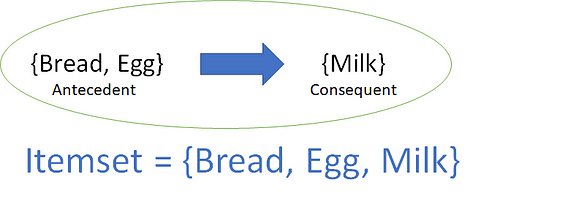
For example, if there are 6 items {Bread, Butter, Egg, Milk, Notebook, Toothbrush} on all the transactions combined, itemsets will look like {Bread}, {Butter}, {Bread, Notebook}, {Milk, Toothbrush}, {Milk, Egg, Vegetables} etc. Size of an itemset can vary from one to the total number of items that we have. Now, we seek only frequent itemsets from this and not all so as to put a check on the number of total itemsets generated.
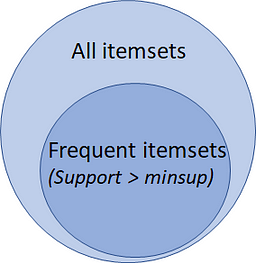
Frequent itemsets are the ones which occur at least a minimum number of times in the transactions. Technically, these are the itemsets for which support value (fraction of transactions containing the itemset) is above a **minimum threshold — min_support. We have kept min_support=0.07 in our above code**.

So, {Bread, Notebook} might not be a frequent itemset if it occurs only 2 times out of 100 transactions and (2/100) = 0.02 falls below the value of min_support.




In [26]:
#With 10% Support
frequent_itemsets=apriori(data,min_support=0.1,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\Rohit Shelar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


## Observations from Support Values:
**Head 5**

- 60 percent of 100 purchases are Sixth Sense
- 70 percent of 100 purchases are Gladiator
- 20 percent of 100 purchases are LOTR1
- 20 percent of 100 purchases are Harry Potter
- 60 percent of 100 purchases are Patriot

**Tail 5**

- 10 percent of 100 purchases are Green Mile, LOTR1, Harry Potter1, Sixth Sense
- 10 percent of 100 purchases are Green Mile, LOTR2, LOTR1, Sixth Sense
- 10 percent of 100 purchases are Green Mile, LOTR2, Harry Potter1, Sixth Sense
- 10 percent of 100 purchases are Green Mile, LOTR2, LOTR1, Harry Potter1
- 10 percent of 100 purchases are Sixth Sense, LOTR2, Harry Potter1, Green Mile, LOTR1

In [27]:
#With 30% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
212,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR1),"(Green Mile, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Harry Potter1),"(Green Mile, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


### Observations
- Antecedent support variable tells us probability of antecedent products alone
- Consequents support variable tells us probability of consequents products alone
- The support value is the value of the two products (Antecedents and Consequents)
- Confidence is an indication of how often the rule has been found to be true.
- The ratio of the observed support to that expected if X and Y were independent.
- A leverage value of 0 indicates independence. Range will be [-1 1]
- A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [28]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
126,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
180,"(Green Mile, LOTR1)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
116,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
118,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
157,"(LOTR1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
14,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333


In [29]:
#Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
212,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR1),"(Green Mile, Harry Potter1, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Green Mile),"(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Harry Potter1),"(Green Mile, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


## Visualization - Obtained Rule

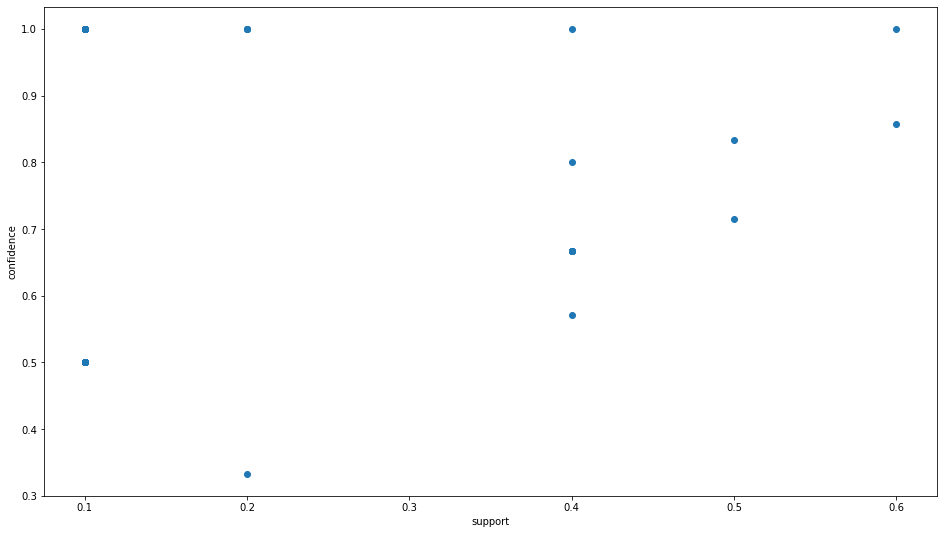

In [30]:
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [31]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Sixth Sense),"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)","(Green Mile, Harry Potter1)","(Green Mile, LOTR2)",(Harry Potter1),"(Gladiator, Green Mile, Sixth Sense)","(Gladiator, LOTR, Sixth Sense)","(LOTR2, LOTR1, Sixth Sense)","(Harry Potter1, LOTR2, Sixth Sense)","(Green Mile, LOTR1, Sixth Sense)","(Green Mile, Harry Potter1, Sixth Sense)","(Green Mile, LOTR2, Sixth Sense)",(LOTR1),"(Green Mile, LOTR2, LOTR1)","(Green Mile, Harry Potter1, LOTR2)","(Green Mile, Harry Potter1, LOTR2, Sixth Sense)","(LOTR2, LOTR1)","(Green Mile, LOTR2, LOTR1, Sixth Sense)","(Harry Potter1, LOTR1)","(Gladiator, Green Mile)","(Harry Potter1, LOTR2, LOTR1, Sixth Sense)",(Gladiator),(Patriot),(Green Mile),"(Green Mile, Harry Potter1, LOTR1)",(LOTR2),"(Harry Potter1, LOTR2, LOTR1)",(Harry Potter2),(LOTR),"(Gladiator, LOTR)","(Harry Potter1, LOTR1, Sixth Sense)","(Gladiator, Sixth Sense)","(Gladiator, Patriot)","(LOTR1, Sixth Sense)","(Harry Potter1, Sixth Sense)","(LOTR2, Sixth Sense)","(Green Mile, Sixth Sense)","(LOTR, Sixth Sense)","(Patriot, Sixth Sense)","(Green Mile, Harry Potter1, LOTR1, Sixth Sense)"
antecedents,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN
"(Green Mile, LOTR2)",1.666667,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN
"(Green Mile, LOTR)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, LOTR1)",NaN,NaN,NaN,5.0,NaN,2.5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,2.5,NaN,NaN,NaN
(Harry Potter1),NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,5.0,NaN,5.0,2.5,5.0,NaN,NaN,2.5,5.0,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,2.5,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,2.5,NaN,NaN,NaN
"(Gladiator, LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, LOTR, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5]),
 [Text(0.5, 0, "frozenset({'Sixth Sense'})"),
  Text(1.5, 0, "frozenset({'Harry Potter1', 'LOTR2'})"),
  Text(2.5, 0, "frozenset({'Green Mile', 'LOTR1'})"),
  Text(3.5, 0, "frozenset({'Green Mile', 'Harry Potter1'})"),
  Text(4.5, 0, "frozenset({'Green Mile', 'LOTR2'})"),
  Text(5.5, 0, "frozenset({'Harry Potter1'})"),
  Text(6.5, 0, "frozenset({'Gladiator', 'Green Mile', 'Sixth Sense'})"),
  Text(7.5, 0, "frozenset({'Gladiator', 'LOTR', 'Sixth Sense'})"),
  Text(8.5, 0, "frozenset({'LOTR2', 'LOTR1', 'Sixth Sense'})"),
  Text(9.5, 0, "frozenset({'Harry Potter1', 'LOTR2', 'Sixth Sense'})"),
  Text(10.5, 0, "frozenset({'Green Mile', 'LOTR1', 'Sixth Sense'})"),
  Text(11.5, 0, "frozenset({'Green Mile', 'Harry Pott

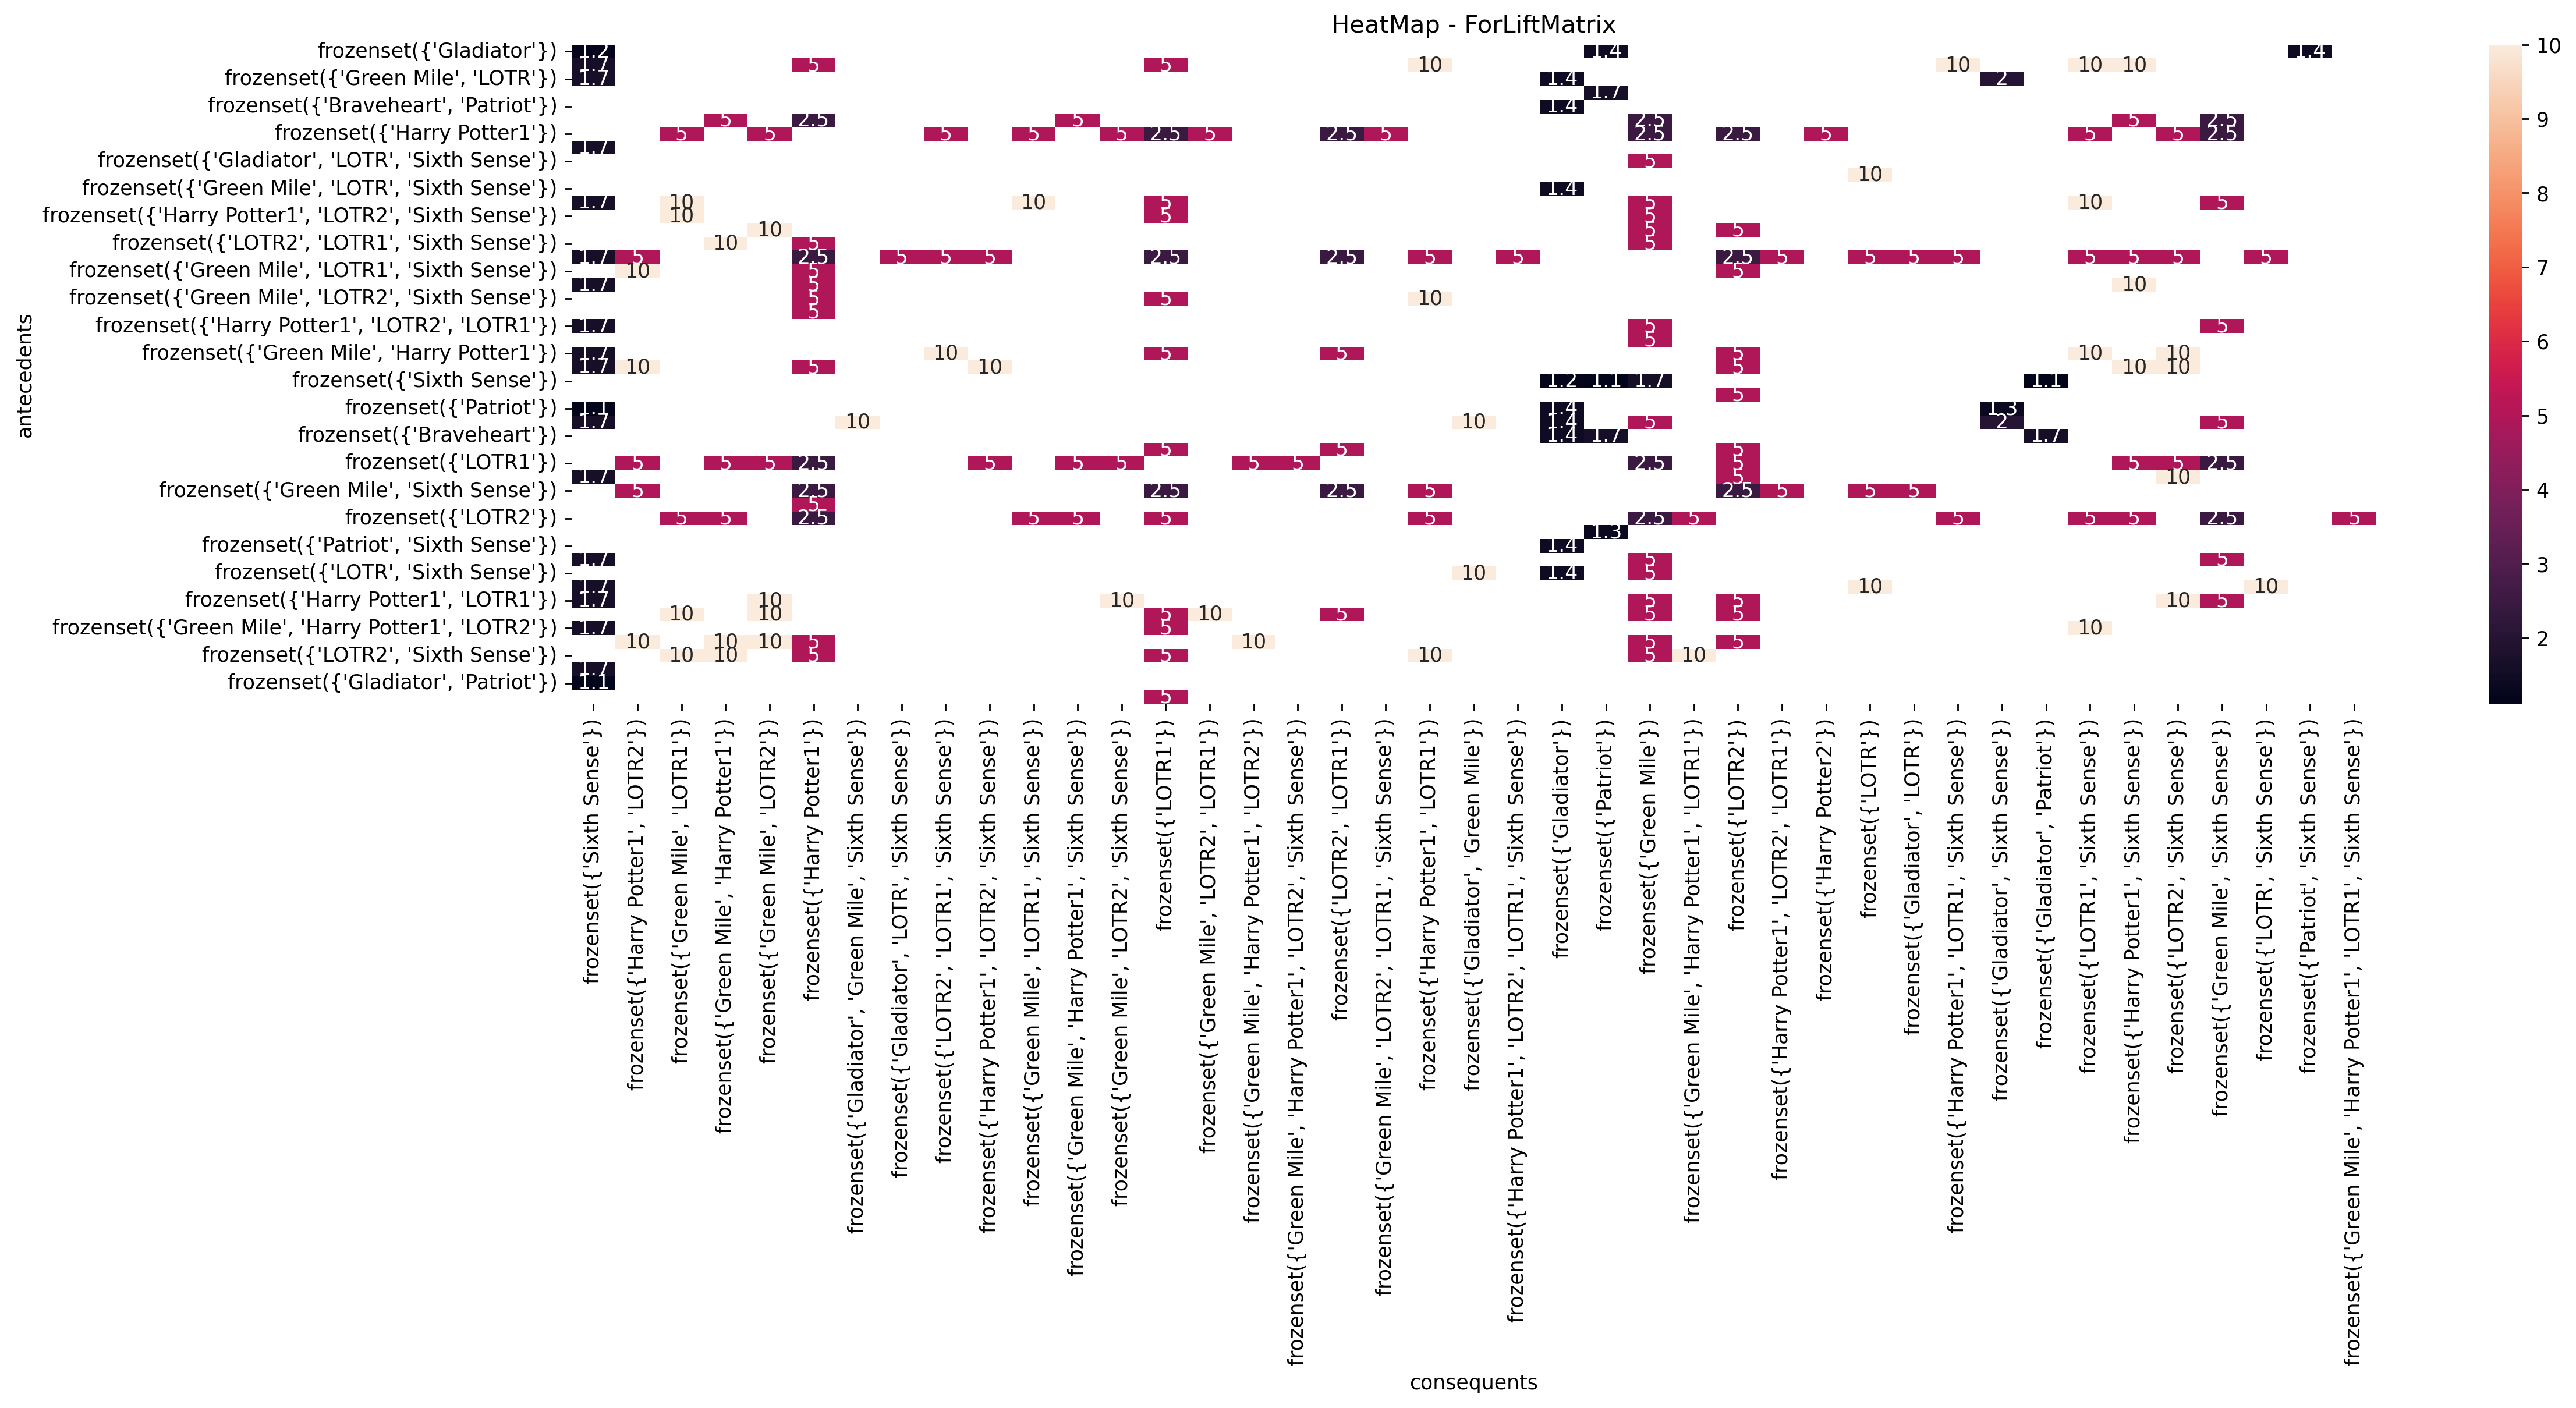

In [32]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

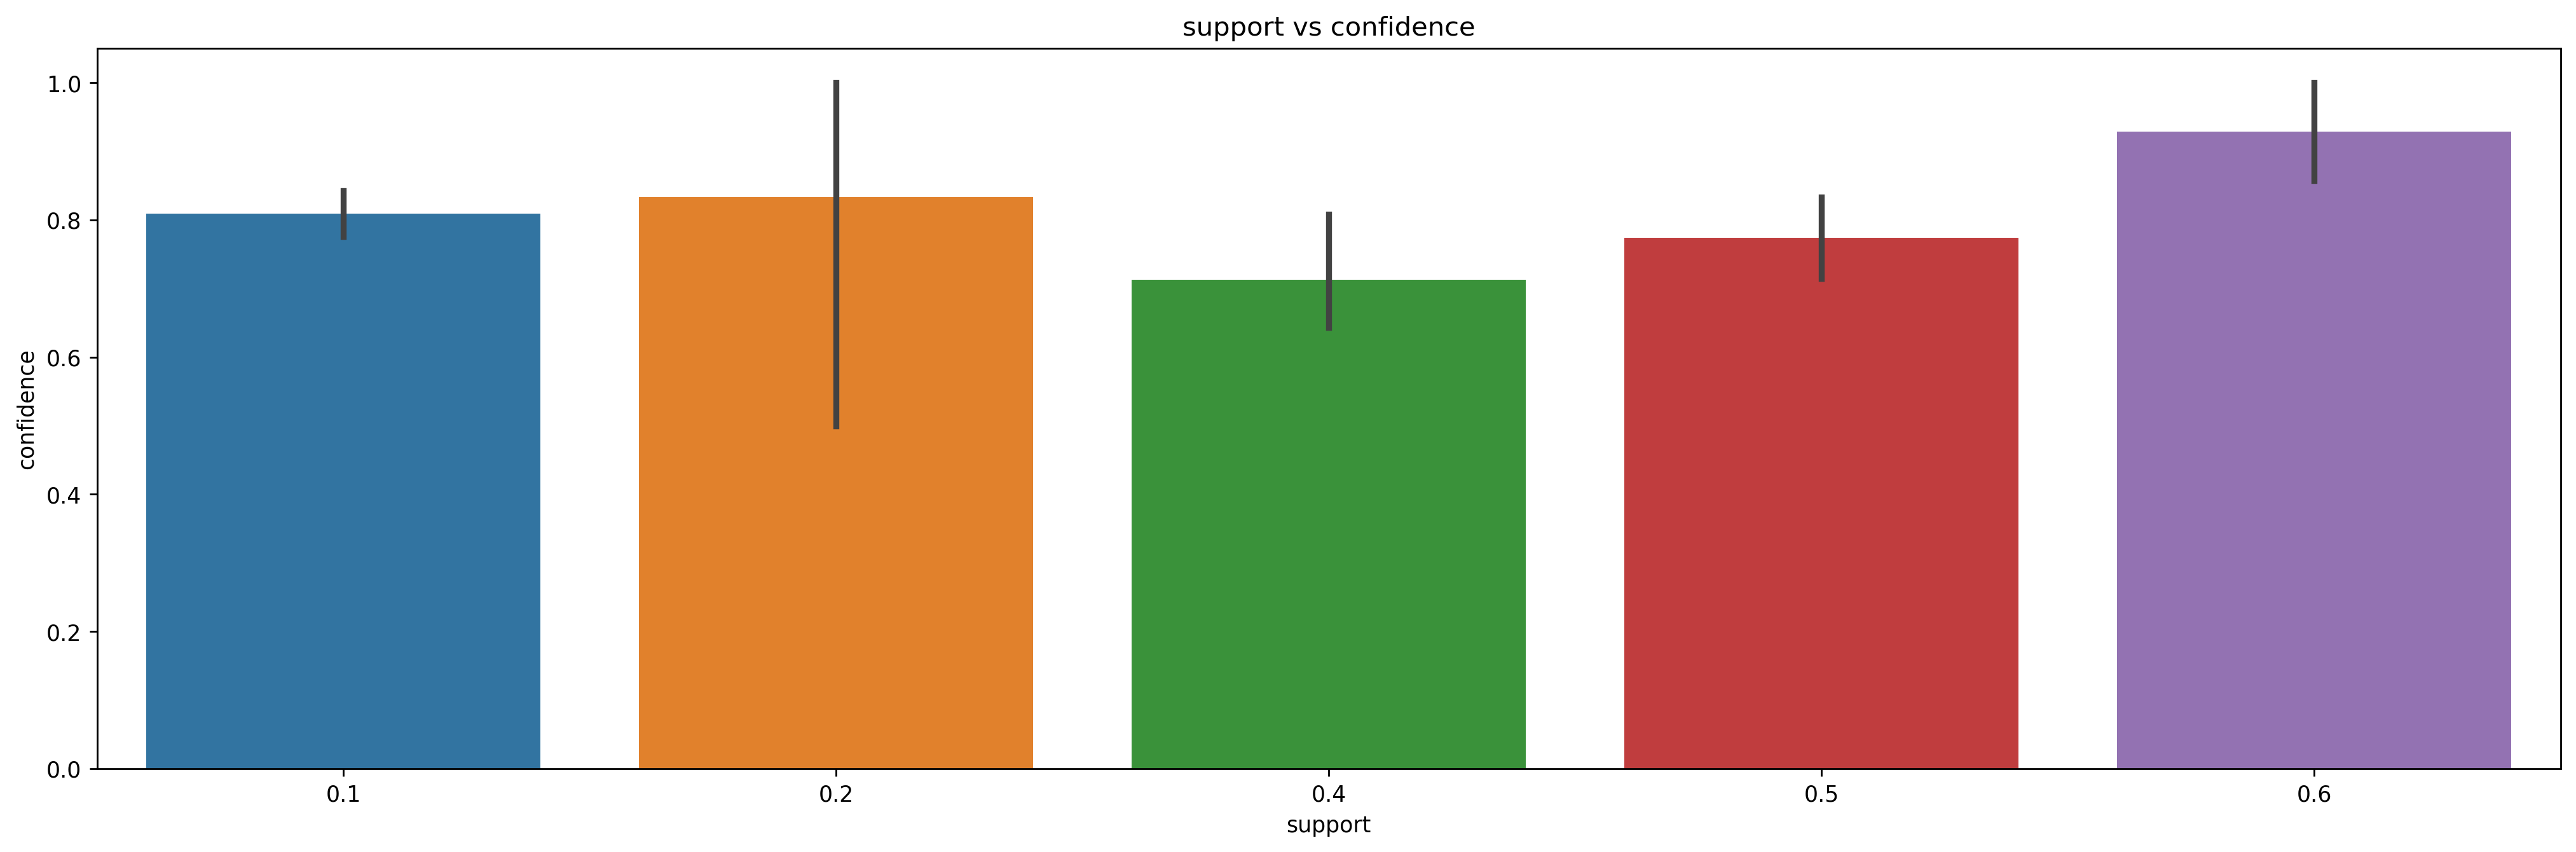

In [33]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=lift)
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

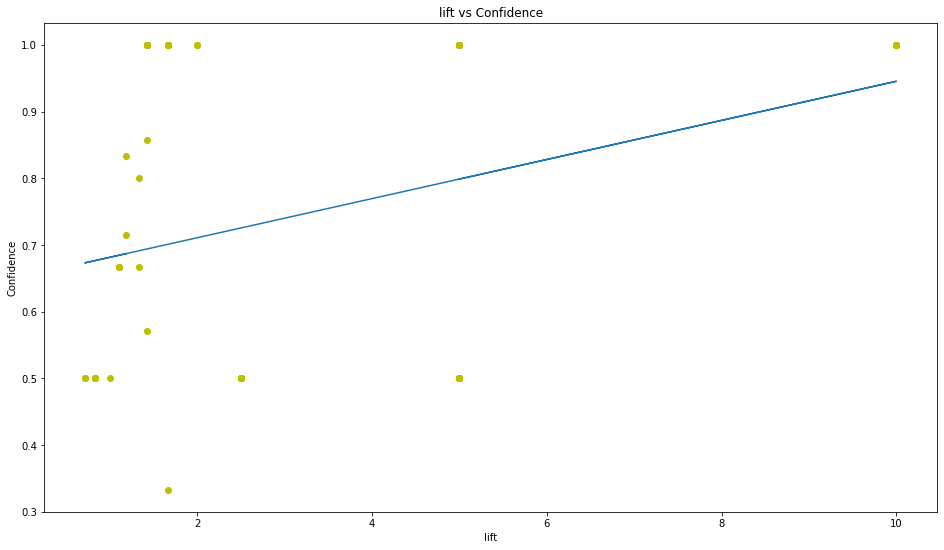

In [34]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

## Association rules with 15% Support and 40% confidence

In [35]:
#With 15% Support
frequent_itemsets=apriori(data,min_support=0.15,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\Rohit Shelar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Gladiator, Sixth Sense)",2
8,0.4,"(Patriot, Sixth Sense)",2
9,0.2,"(Green Mile, Sixth Sense)",2


### Observations from Support value:

**Head 5**

- 42 percent of 100 purchases are Sixth Sense
- 24 percent of 100 purchases are Gladiator
- 43 percent of 100 purchases are LOTR1
- 28 percent of 100 purchases are Harry Potter1
- 21 percent of 100 purchases are Patriot

In [36]:
#with 40% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


### Observations:
- Antecedent support variable tells us probability of antecedent products alone
- Consequents support variable tells us probability of consequents products alone
- The support value is the value of the two products (Antecedents and Consequents)
- Confidence is an indication of how often the rule has been found to be true.
- The ratio of the observed support to that expected if X and Y were independent.
- A leverage value of 0 indicates independence. Range will be [-1 1]
- A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [37]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
12,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
13,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000


In [38]:
#Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


# Visualization - Obtained Rule

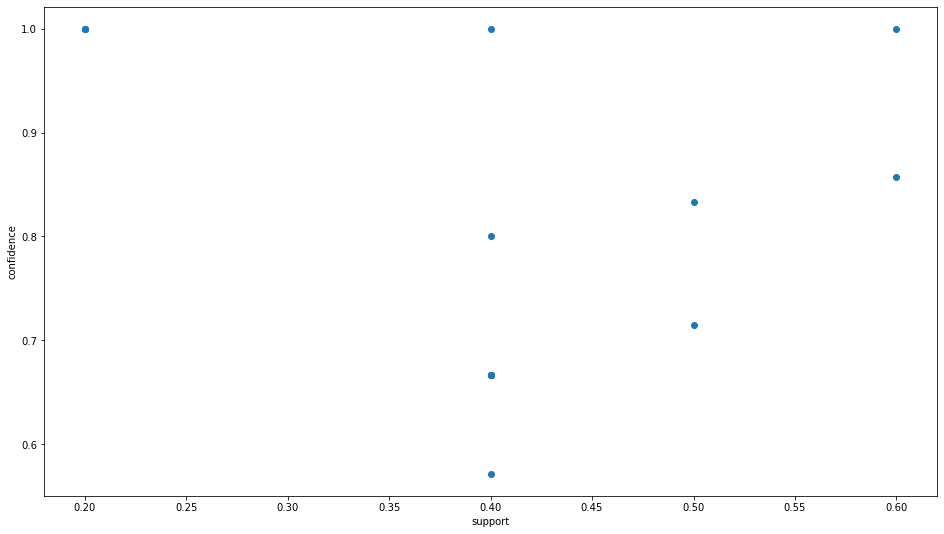

In [39]:
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [40]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Sixth Sense),(Gladiator),(Patriot),(LOTR1),(LOTR2),"(Patriot, Sixth Sense)","(Gladiator, Sixth Sense)","(Gladiator, Patriot)"
antecedents,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,NaN,NaN,1.428571,NaN,NaN
(Sixth Sense),NaN,1.190476,1.111111,NaN,NaN,NaN,NaN,1.111111
(Patriot),1.111111,1.428571,NaN,NaN,NaN,NaN,1.333333,NaN
(Green Mile),1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Gladiator, Patriot)",1.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Sixth Sense)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN
"(Patriot, Sixth Sense)",NaN,1.428571,NaN,NaN,NaN,NaN,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, "frozenset({'Sixth Sense'})"),
  Text(1.5, 0, "frozenset({'Gladiator'})"),
  Text(2.5, 0, "frozenset({'Patriot'})"),
  Text(3.5, 0, "frozenset({'LOTR1'})"),
  Text(4.5, 0, "frozenset({'LOTR2'})"),
  Text(5.5, 0, "frozenset({'Patriot', 'Sixth Sense'})"),
  Text(6.5, 0, "frozenset({'Gladiator', 'Sixth Sense'})"),
  Text(7.5, 0, "frozenset({'Gladiator', 'Patriot'})")])

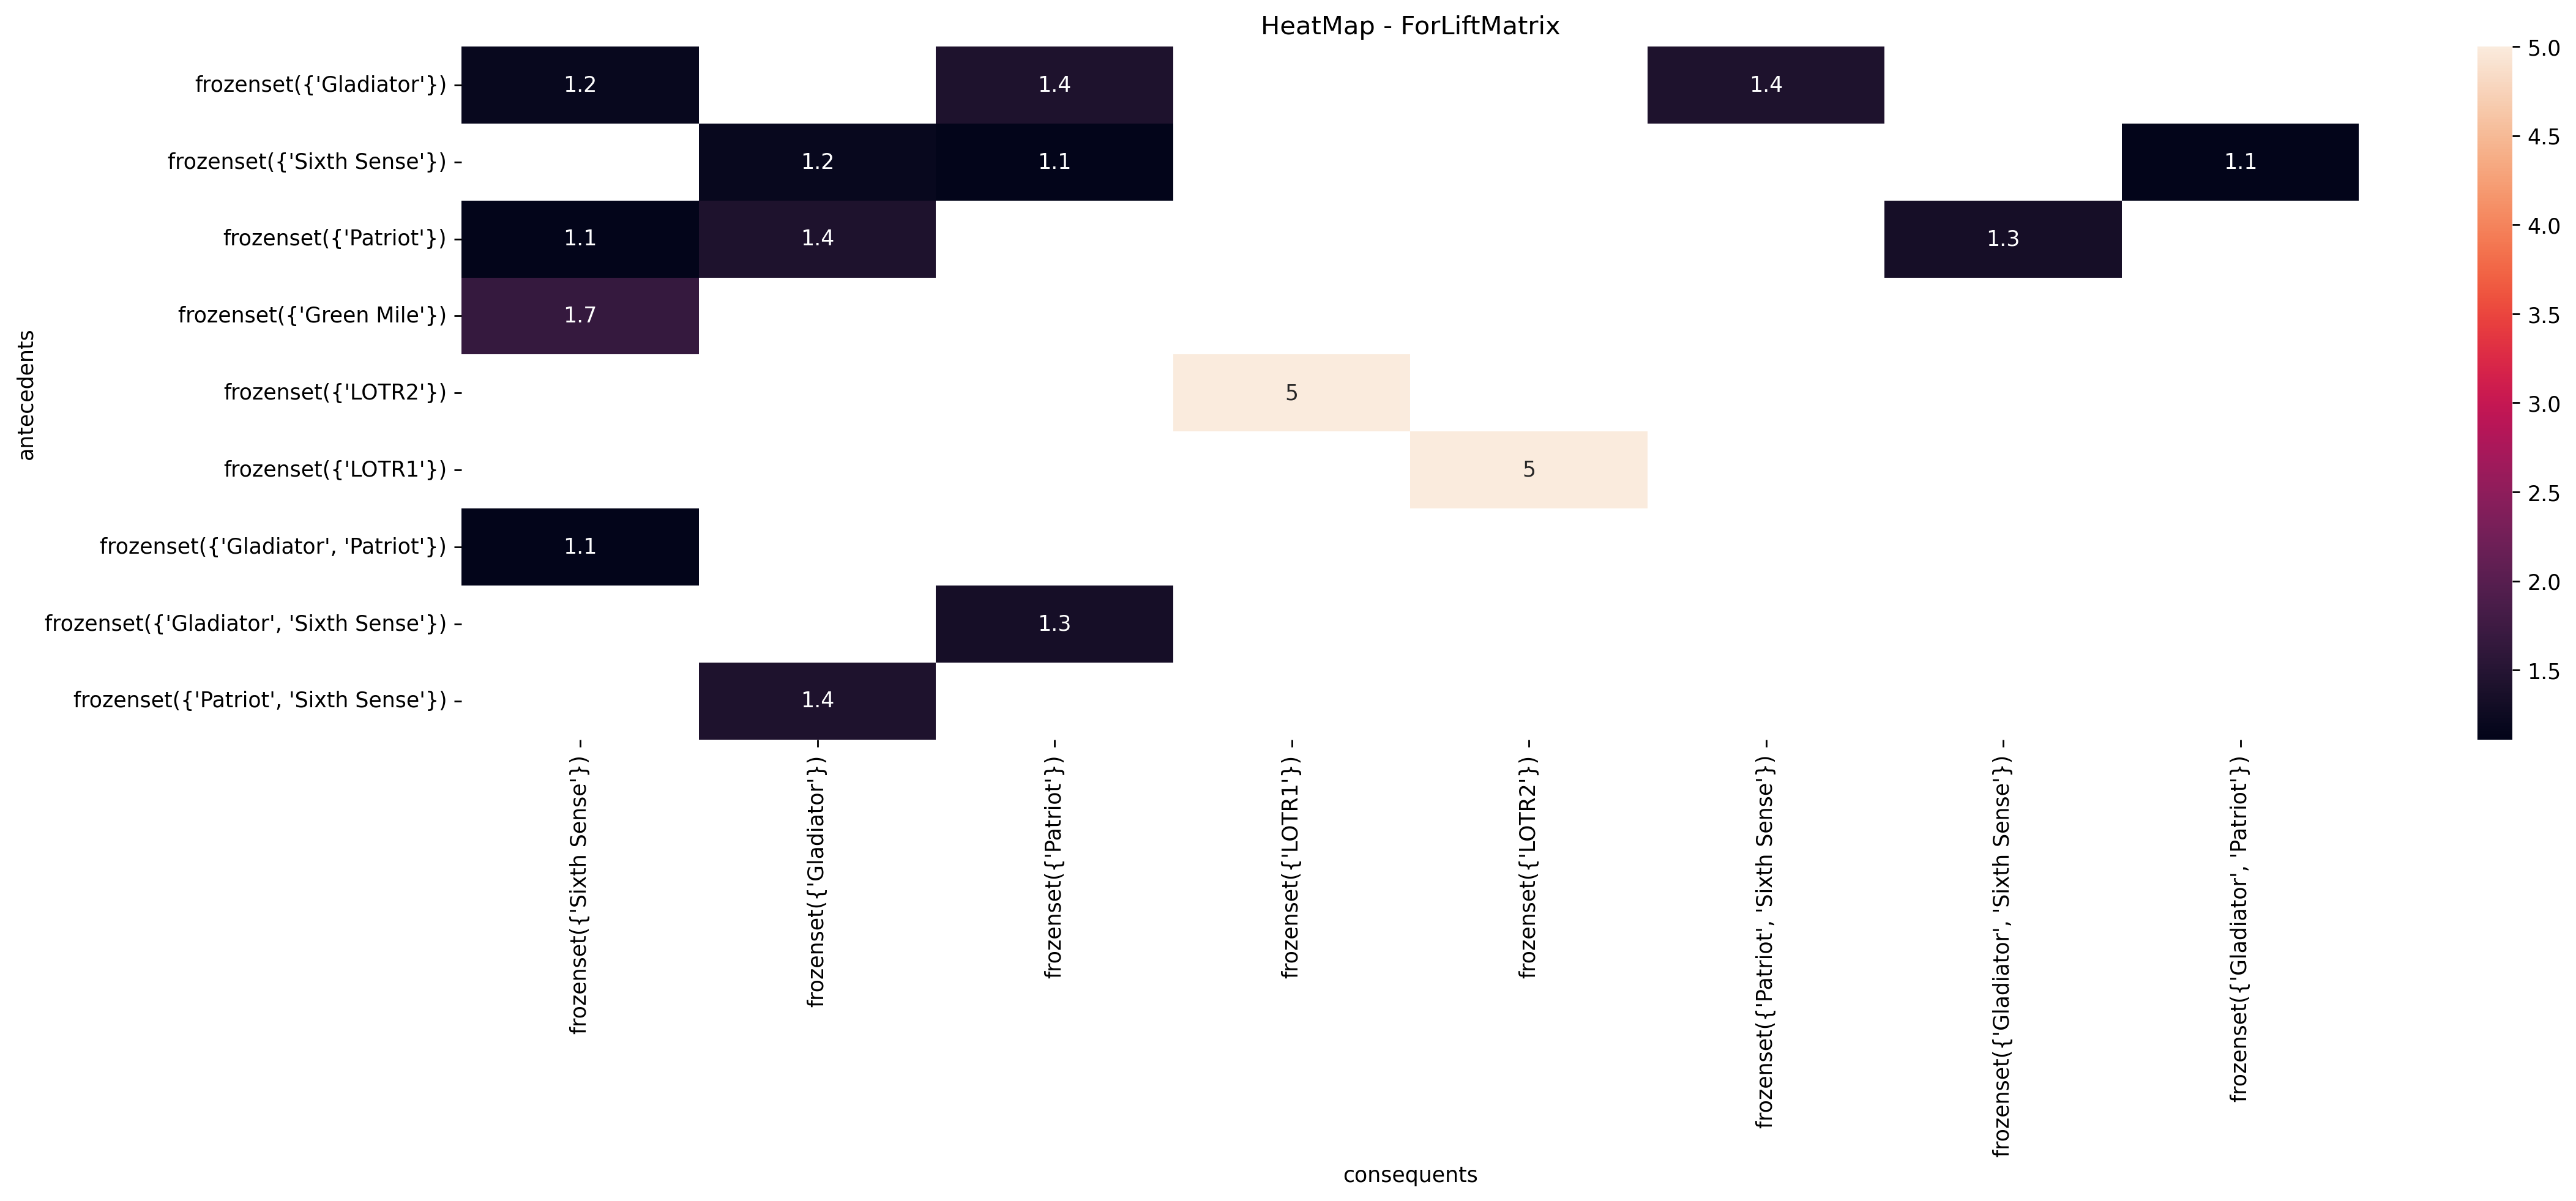

In [41]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

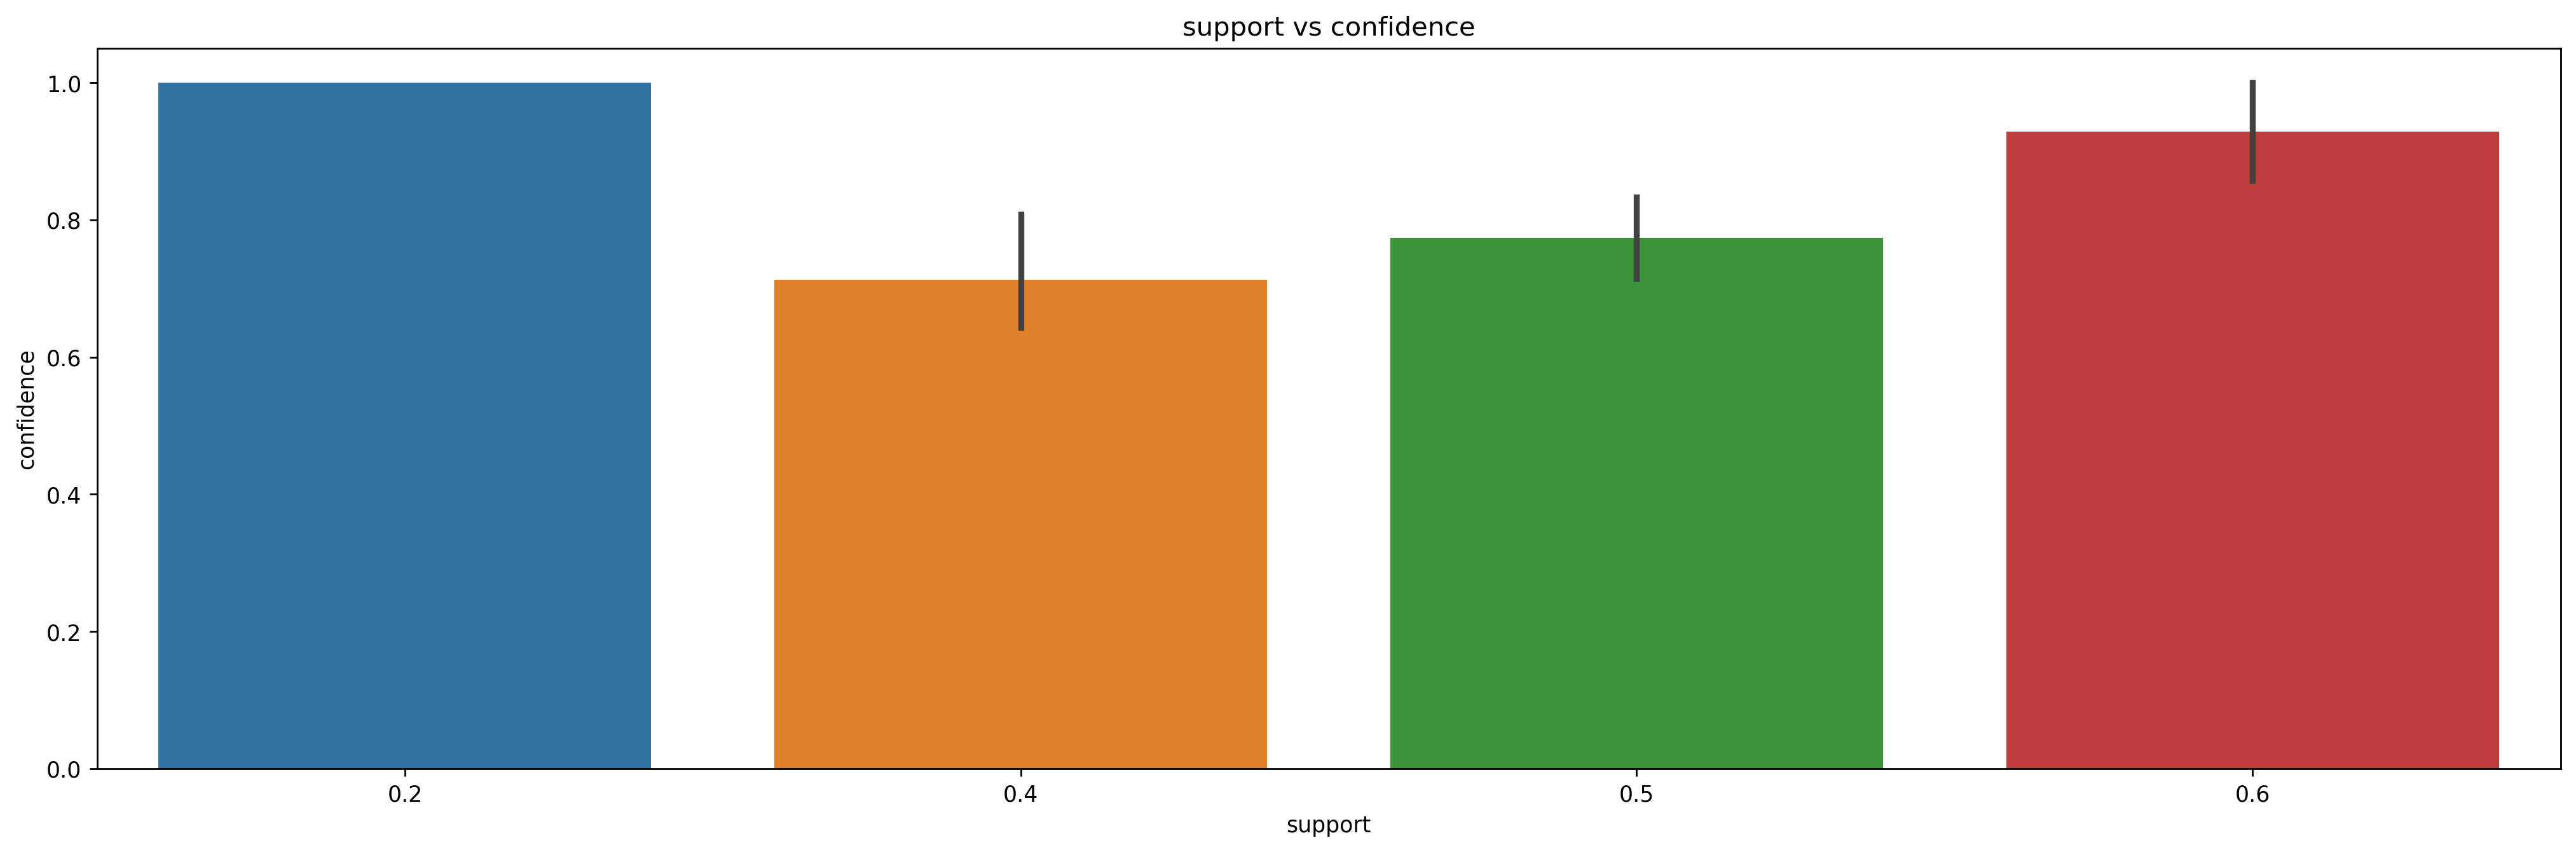

In [42]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=lift)
plt.title("support vs confidence")
plt.show()

Text(0.5, 1.0, 'lift vs Confidence')

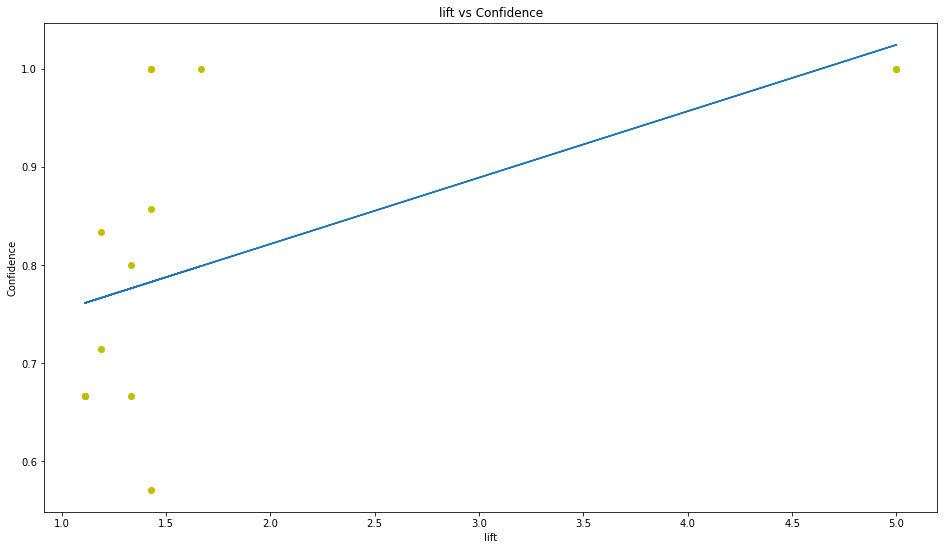

In [43]:
plt.figure(figsize=(16,9))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
fit_fn(rules['lift']))
plt.xlabel('lift')
plt.ylabel('Confidence')
plt.title('lift vs Confidence')

## Association rules with 20% Support and 60% confidence

In [44]:
#With 20% Support
frequent_itemsets=apriori(data,min_support=0.2,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

C:\Users\Rohit Shelar\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Gladiator, Sixth Sense)",2
8,0.4,"(Patriot, Sixth Sense)",2
9,0.2,"(Green Mile, Sixth Sense)",2


### Observations from Support value:

**Head 5**

- 42 percent of 100 purchases are Sixth Sense
- 24 percent of 100 purchases are Gladiator
- 43 percent of 100 purchases are LOTR1
- 28 percent of 100 purchases are Harry Potter1
- 21 percent of 100 purchases are Patriot

In [45]:
#with 60% Confidence
rules = association_rules(frequent_itemsets,metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


### Observations
- Antecedent support variable tells us probability of antecedent products alone
- Consequents support variable tells us probability of consequents products alone
- The support value is the value of the two products (Antecedents and Consequents)
- Confidence is an indication of how often the rule has been found to be true.
- The ratio of the observed support to that expected if X and Y were independent.
- A leverage value of 0 indicates independence. Range will be [-1 1]
- A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [46]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
12,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333


In [47]:
#Lift Ratio > 1 is a good influential rule in selecting the associated transactions
lift=rules[rules.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


## Visualization of obtained rule

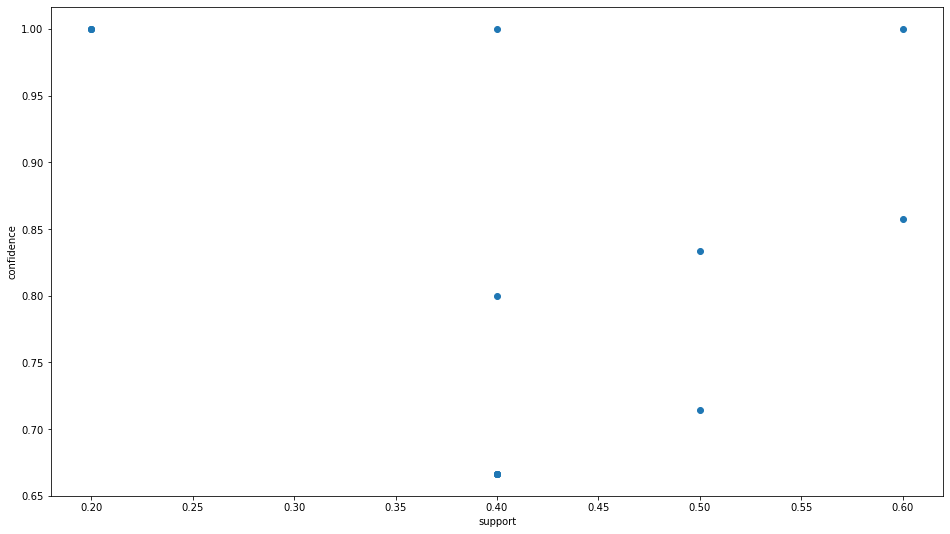

In [48]:
plt.figure(figsize=(16,9))
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [49]:
matrix = lift.pivot('antecedents','consequents','lift')
matrix

consequents,(Sixth Sense),(Gladiator),(Patriot),(LOTR1),(LOTR2),"(Gladiator, Sixth Sense)","(Gladiator, Patriot)"
antecedents,,,,,,,
(Gladiator),1.190476,NaN,1.428571,NaN,NaN,NaN,NaN
(Sixth Sense),NaN,1.190476,1.111111,NaN,NaN,NaN,1.111111
(Patriot),1.111111,1.428571,NaN,NaN,NaN,1.333333,NaN
(Green Mile),1.666667,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,5.0,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,NaN,5.0,NaN,NaN
"(Gladiator, Patriot)",1.111111,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Sixth Sense)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN
"(Patriot, Sixth Sense)",NaN,1.428571,NaN,NaN,NaN,NaN,NaN


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, "frozenset({'Sixth Sense'})"),
  Text(1.5, 0, "frozenset({'Gladiator'})"),
  Text(2.5, 0, "frozenset({'Patriot'})"),
  Text(3.5, 0, "frozenset({'LOTR1'})"),
  Text(4.5, 0, "frozenset({'LOTR2'})"),
  Text(5.5, 0, "frozenset({'Gladiator', 'Sixth Sense'})"),
  Text(6.5, 0, "frozenset({'Gladiator', 'Patriot'})")])

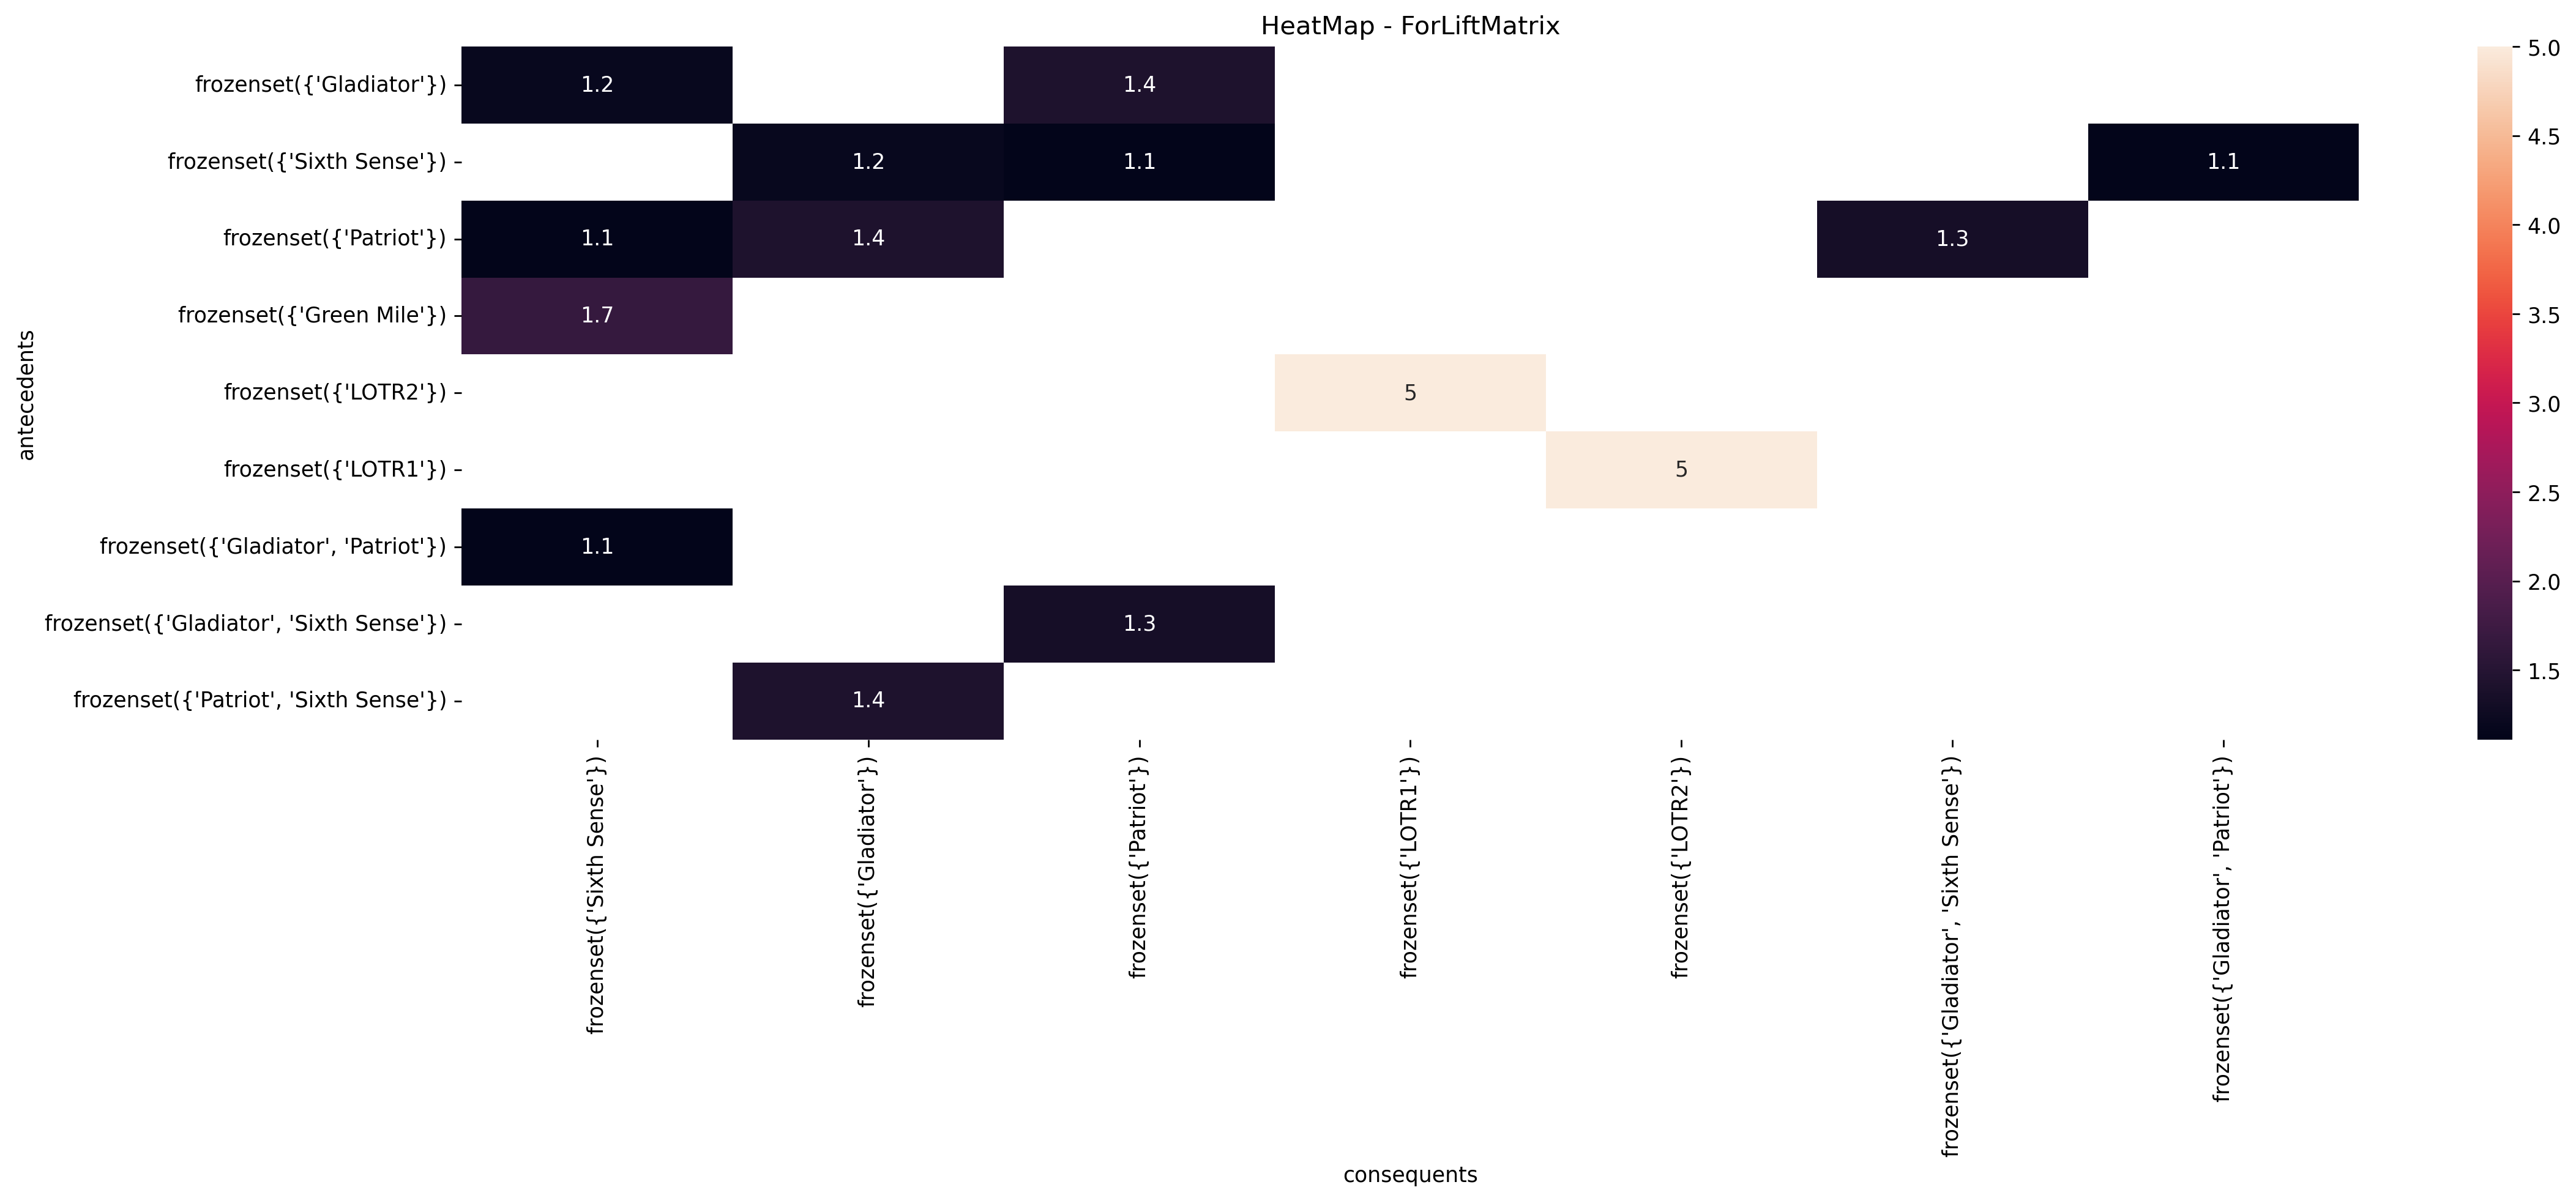

In [50]:
plt.figure(figsize=(20,6),dpi=250)
sns.heatmap(matrix,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

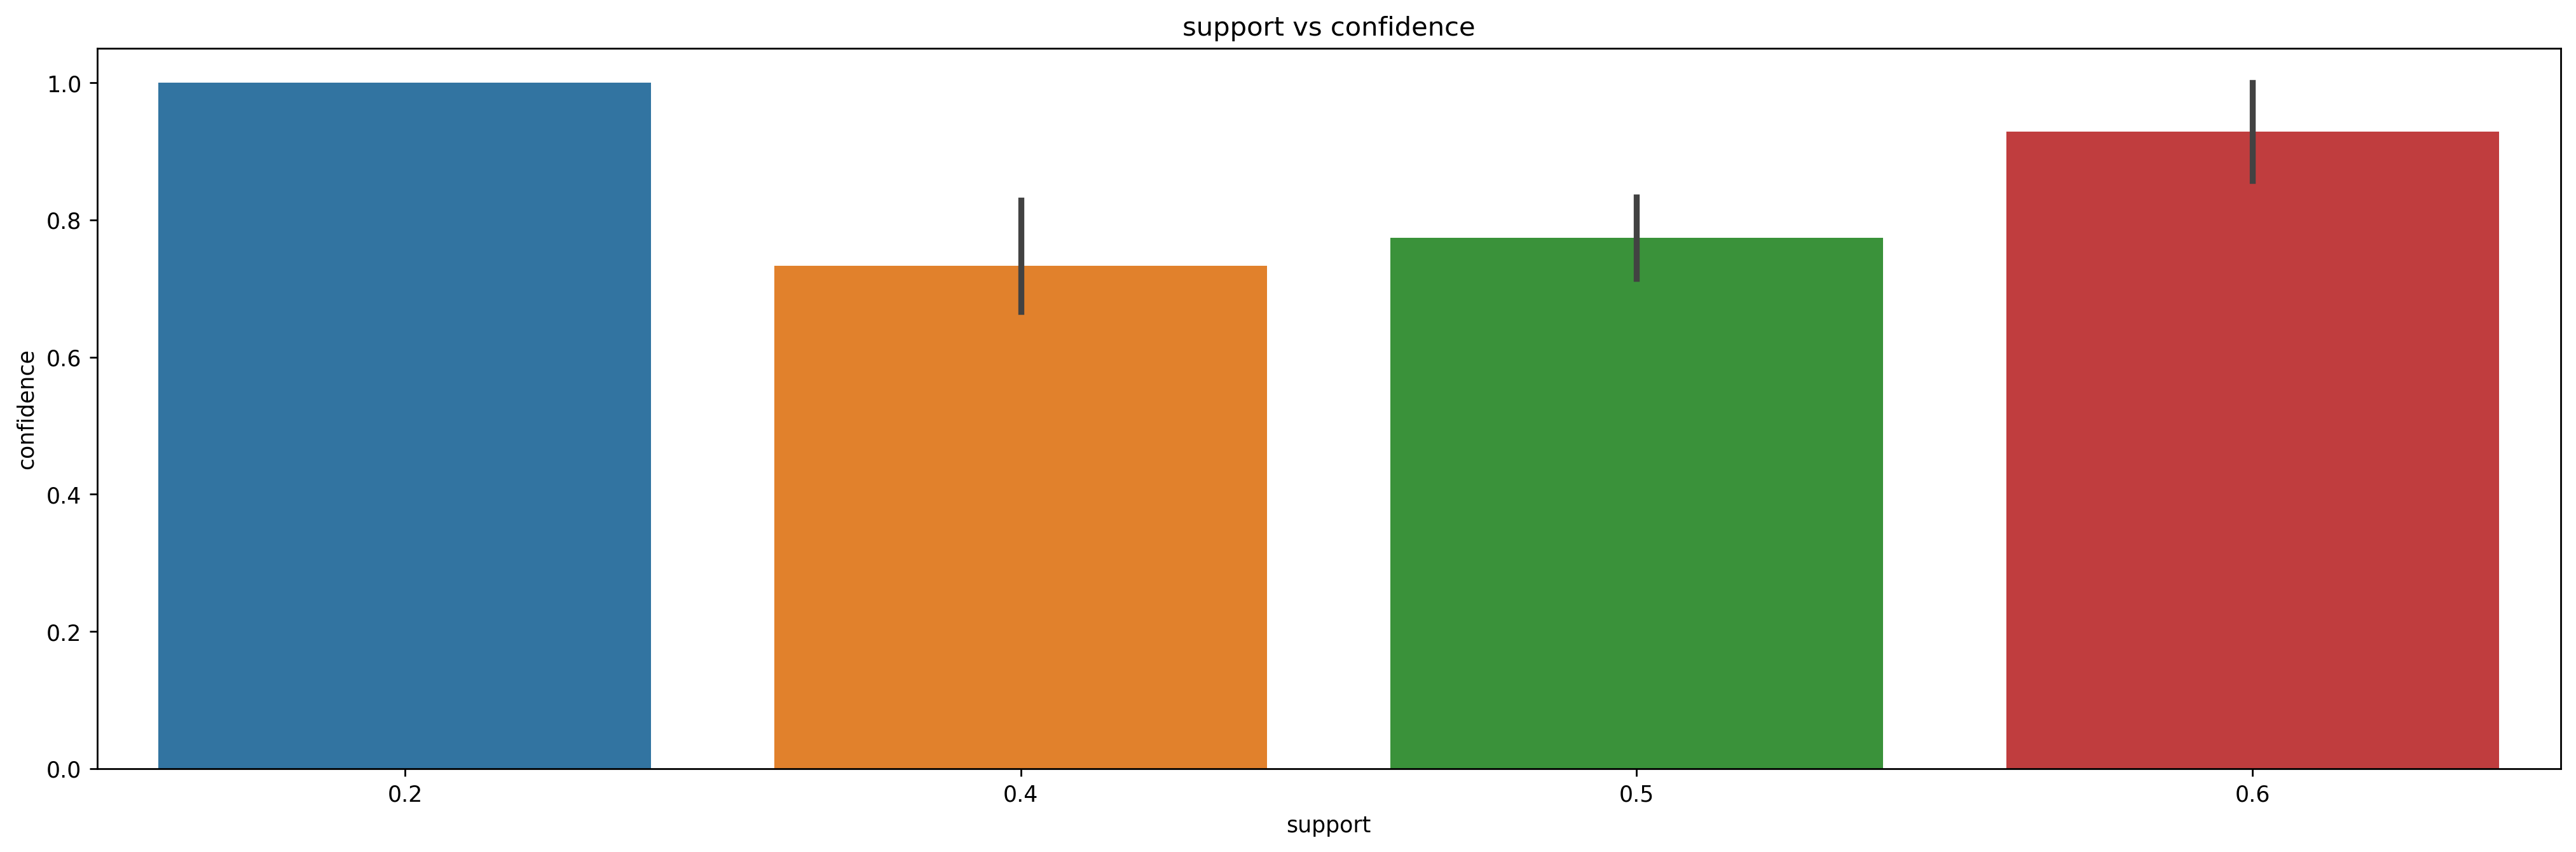

In [51]:
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=lift)
plt.title("support vs confidence")
plt.show()